In [1]:
#first we bring in tools from sk learn 
# check scikit-learn version
import sklearn
# now lets bring in the apropriate data set 
# synthetic classification dataset
from numpy import where
from numpy import unique
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.cluster import AffinityPropagation

print(sklearn.__version__)

0.22.1


<h1> Clustering Dataset</h1>
    
We will use the make_classification() function to create a test binary classification dataset.

The dataset will have 1,000 examples, with two input features and one cluster per class. The clusters are visually obvious in two dimensions so that we can plot the data with a scatter plot and color the points in the plot by the assigned cluster. This will help to see, at least on the test problem, how “well” the clusters were identified.

The clusters in this test problem are based on a multivariate Gaussian, and not all clustering algorithms will be effective at identifying these types of clusters. As such, the results in this tutorial should not be used as the basis for comparing the methods generally.

An example of creating and summarizing the synthetic clustering dataset is listed below.

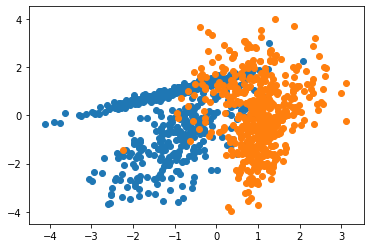

In [2]:
# define dataset by using make classification we can build a test data set how we like 
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=2, random_state=4)

# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

## Affinity Propagation

Affinity Propagation involves finding a set of exemplars that best summarize the data.

We devised a method called “affinity propagation,” which takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges

In [3]:
# define the model
model = AffinityPropagation(damping=0.9)

In [4]:
# fit the model
model.fit(X)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.9, max_iter=200, preference=None, verbose=False)

In [5]:
# assign a cluster to each example
yhat = model.predict(X)

In [6]:
# retrieve unique clusters
clusters = unique(yhat)

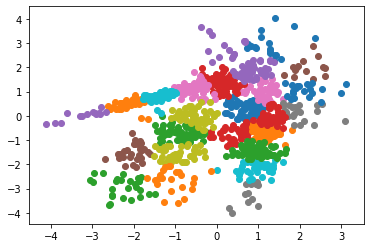

In [7]:
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

## Results
Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.